# Corrigez une série temporelle des variations saisonnières

Le chapitre du cours d'Open Classroom associé  
[Corrigez une série temporelle des variations saisonnières](https://openclassrooms.com/fr/courses/4525371-analysez-et-modelisez-des-series-temporelles/4525378-comprenez-les-variations-saisonnieres)

## Exemple Y = Tendance + Saisonnalité + Résidu

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("darkgrid")

In [2]:
mois = list(range(1, 38)) # dernier 37 : janvier de la 3ème année

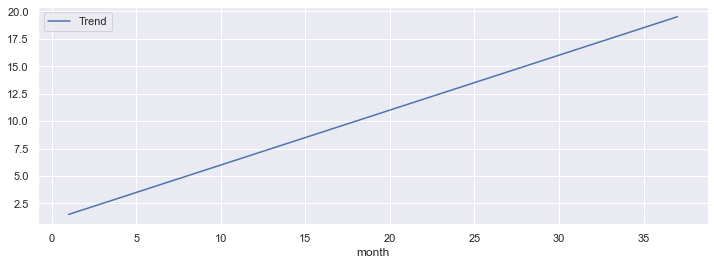

In [3]:
# Tendance
T = [(1+ 0.5 * t) for t in mois]

df_Trend = pd.DataFrame(list(zip(mois, T)), columns = ['month', 'Trend'])
df_Trend.set_index('month', inplace=True)
sns.lineplot(data = df_Trend)
plt.show()

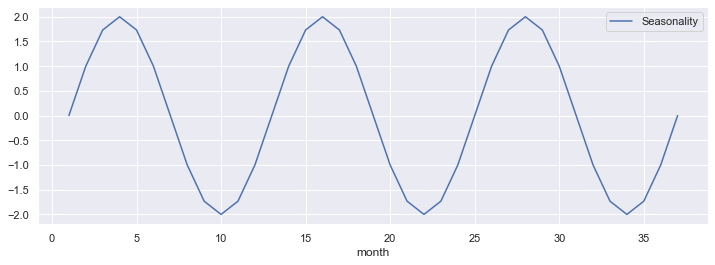

In [4]:
# Saisonnalité
S = [2*math.sin((t-1)*(2*math.pi)/12) for t in mois]

df_Seasonality = pd.DataFrame(list(zip(mois, S)), columns = ['month', 'Seasonality'])
df_Seasonality.set_index('month', inplace=True)
sns.lineplot(data = df_Seasonality)
plt.show()

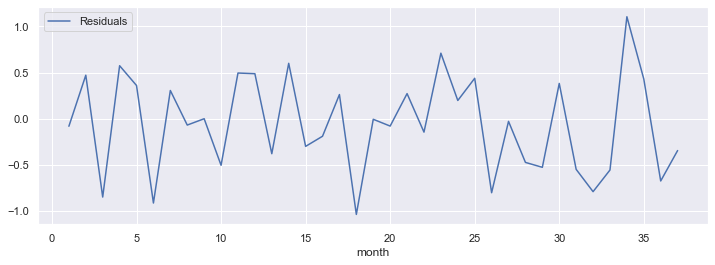

In [5]:
# Résidu
# modélisé par un bruit gaussien d'écart type 0.5
import numpy as np

epsilon = np.random.normal(0,0.5,37)

df_Residuals = pd.DataFrame(list(zip(mois, list(epsilon))), columns = ['month', 'Residuals'])
df_Residuals.set_index('month', inplace=True)
sns.lineplot(data = df_Residuals)
plt.show()

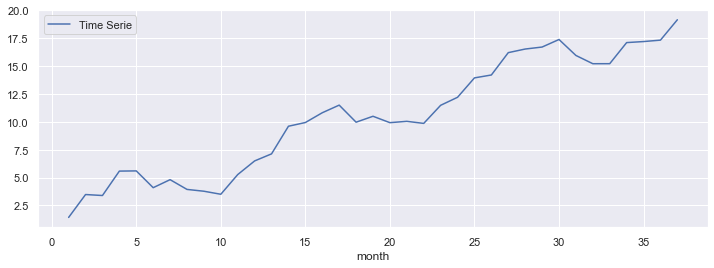

In [6]:
# Série temporelle complète
TS = np.array(T) + np.array(S) + epsilon

df_ts = pd.DataFrame(list(zip(mois, list(TS))), columns = ['month', 'Time Serie'])
df_ts.set_index('month', inplace=True)
sns.lineplot(data = df_ts)
plt.show()

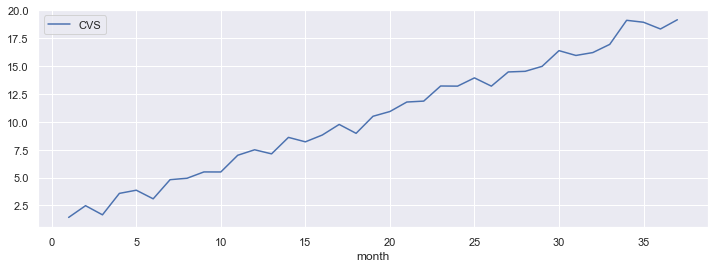

In [7]:
# Courbe corrigée des variation saisonnières
CVS = np.array(T) + epsilon

df_cvs = pd.DataFrame(list(zip(mois, list(CVS))), columns = ['month', 'CVS'])
df_cvs.set_index('month', inplace=True)
sns.lineplot(data = df_cvs)
plt.show()

## TP : Désaisonnalisez à l'aide de la régression linéaire

Sauf mention contraire, on travaillera dans la suite du cours sur la série temporelle airpass. 
On la stockera sous la variable x, et son logarithme sous la variable y:

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(9,6)})  # resize seaborn plot in jupyter notebook
# Using an implicitly registered datetime converter for a matplotlib plotting method
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set_style("darkgrid")

AirPassengers = pd.read_csv("../Data/AirPassengers.csv", parse_dates=[0], dayfirst=True, index_col="t")

In [31]:
x = AirPassengers
y = np.log(AirPassengers)

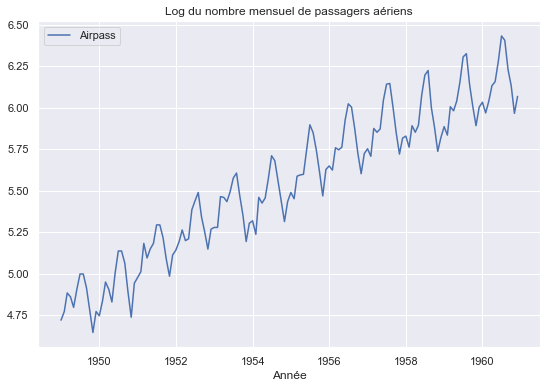

In [32]:
sns.lineplot(data = y)
plt.xlabel('Année')
plt.title('Log du nombre mensuel de passagers aériens')
plt.show()

On souhaite désaisonnaliser la série temporelle airpass à l'aide de la régression linéaire. On créé à cet effet les bases tendancielle et saisonnière :

In [33]:
y.head()

Airpass
t                   
1949-01-01  4.718499
1949-02-01  4.770685
1949-03-01  4.882802
1949-04-01  4.859812
1949-05-01  4.795791

In [34]:
y.shape

(144, 1)

On a 144 mois, on va réindicer notre série temporelle avec une série de chiffres dont le modulo 12 correspond au mois.

In [35]:
t = np.array(range(1, 145))
t

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144])

In [36]:
# Construction du vecteur unitaire correspondant au mois de janvier
su = np.repeat(0, repeats=12)
su

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
su[0] = 1
su

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# On doit faire un pavage complet sur la longeur de la série temporelle
tuile = np.array([0, 1, 2])
np.tile(tuile, 2)

array([0, 1, 2, 0, 1, 2])

In [39]:
# Vecteur de la base choisie correpondant au mois de janvier
s1 = np.tile(su, 144 // len(su) + 1)[:144]
s1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# Construction de l'ensemble des vecteurs de la base saisonnalité
for i in range(12):
    su = np.repeat(0, repeats=12)
    su[i] = 1
    s = np.tile(su, 144 // len(su) + 1)[:144]
    vars()['s' + str(i+1)] = s

In [44]:
# Pour le mois de février: s2
s2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

On effectue la régression linéaire (le modèle est transformé, comme vu en cours, afin de pallier le problème de colinéarité) sur la série Yt :

$$Y_{t}= T_{t}+S_{t}+R_{t}$$

$$\hat{Y_{t}}= a+b t + \sum_{i=1}^{12}c_{i}\mathbb{1}_{i}$$

Pour éviter le problème mentionné lors de la régression linéaire

$$\hat{Y_{t}}= \alpha_{1} t + \sum_{i=1}^{12}\beta_{i}\mathbb{1}_{i}$$

In [45]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), y)

LinearRegression(fit_intercept=False)

Les différents coefficients sont contenues dans reg.coef_ :

In [46]:
print(reg.coef_)

[[0.0100688  4.72678037 4.70472554 4.83495267 4.80368381 4.80131117
  4.92345737 5.0273997  5.01810486 4.87347026 4.73531202 4.59159431
  4.7054593 ]]


On revient aux coefficients initiaux :

In [47]:
a = np.mean(reg.coef_[0][1:13])
b = reg.coef_[0][0]
c = reg.coef_[0][1:13] - a

In [48]:
y_cvs = y['Airpass'] - (c[0]*s1+c[1]*s2+c[2]*s3+c[3]*s4+c[4]*s5+c[5]*s6+c[6]*s7+c[7]*s8+c[8]*s9+
                        c[9]*s10+c[10]*s11+c[11]*s12)
# On annule le log:
x_cvs = np.exp(y_cvs)

<AxesSubplot:xlabel='t'>

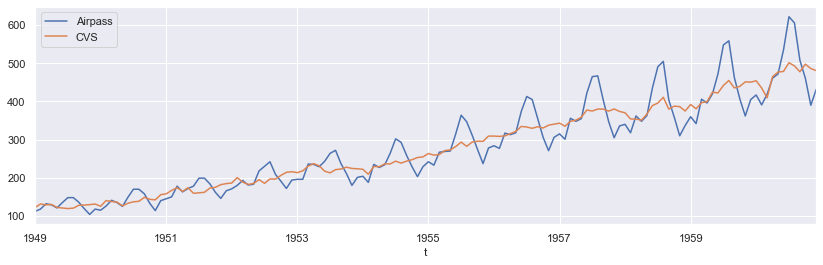

In [49]:
x_cvs = x_cvs.rename("CVS")
x.plot(figsize=(14,4))
x_cvs.plot(legend = True)

## Régression linéaire dans notre exemple factice

Qu'est ce que ça donne?

In [50]:
df_ts.shape

(37, 1)

In [51]:
df_ts.head()

Time Serie
month            
1        1.418970
2        3.472136
3        3.384025
4        5.574944
5        5.592641

In [52]:
y = df_ts

In [53]:
t = np.array(range(1, 38))

In [54]:
for i in range(12):
    su = np.repeat(0, repeats=12)
    su[i] = 1
    s = np.tile(su, 36 // len(su) + 1)[:37]
    vars()['s' + str(i+1)] = s

In [55]:
t.shape

(37,)

In [56]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), y)

LinearRegression(fit_intercept=False)

In [57]:
print(reg.coef_)

[[ 0.49127428  1.07457545  2.21277727  2.47128743  3.1106466   2.91277916
   1.63512018  1.08341954 -0.13772916 -0.64277082 -0.65562497  0.01431125
   0.21370049]]


In [58]:
a = np.mean(reg.coef_[0][1:13])
b = reg.coef_[0][0]
c = reg.coef_[0][1:13] - a

In [59]:
y_cvs = y['Time Serie'] - (c[0]*s1+c[1]*s2+c[2]*s3+c[3]*s4+c[4]*s5+c[5]*s6+c[6]*s7+c[7]*s8+c[8]*s9+
                        c[9]*s10+c[10]*s11+c[11]*s12)
y_cvs

month
1      1.452102
2      2.367067
3      2.020445
4      3.572005
5      3.787570
6      3.559916
7      4.830703
8      5.177327
9      5.518986
10     5.259648
11     6.357123
12     7.382353
13     7.154666
14     8.495807
15     8.569529
16     8.807816
17     9.689438
18     9.436429
19    10.518762
20    11.166345
21    11.791018
22    11.618761
23    12.571989
24    13.092228
25    13.971931
26    13.093769
27    14.840492
28    14.524467
29    14.901104
30    16.855590
31    15.976293
32    16.455908
33    16.963399
34    18.868816
35    18.291936
36    18.220290
37    19.188977
Name: Time Serie, dtype: float64

In [60]:
y_cvs.shape

(37,)

In [61]:
#y_cvs.columns.values[[1]] = ['Approximation']

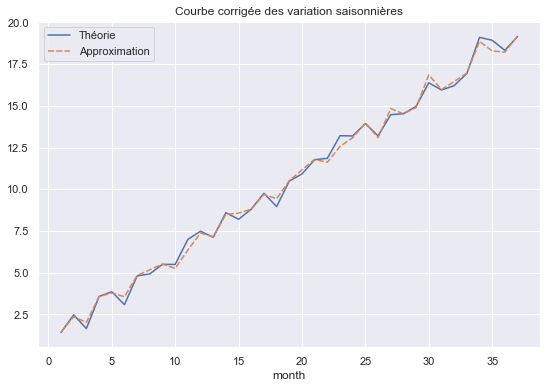

In [67]:
df = df_cvs
df.rename(columns={"CVS": "Théorie"}, inplace=True)
df['Approximation'] = y_cvs
sns.lineplot(data = df)
plt.title('Courbe corrigée des variation saisonnières')
plt.show()

In [68]:
df.shape

(37, 2)

In [69]:
error = sum(abs(df['Approximation'] - df['Théorie']))/df.shape[0]

In [70]:
error

0.1893836147340605

In [71]:
error/(df['Théorie'].mean())

0.018138414737030272